In [1]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'  # path of the JAMLIB python folder
sys.path.append(PATH)  
from corelib import JAMLIB
##############################################
import lhapdf
##############################################

## Using JAMLIB interface

In [2]:
jamPPDF=JAMLIB(PATH+'JAM15/PPDF')
jamT3PPDF=JAMLIB(PATH+'JAM15/T3PPDF')
#JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
#JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading JAM15/PPDF tables [100%]
#######

In [3]:
print jamPPDF.flavors()
print jamT3PPDF.flavors()

['g', 'sp', 'up', 'bp', 'cp', 'dp']
['up', 'dp']


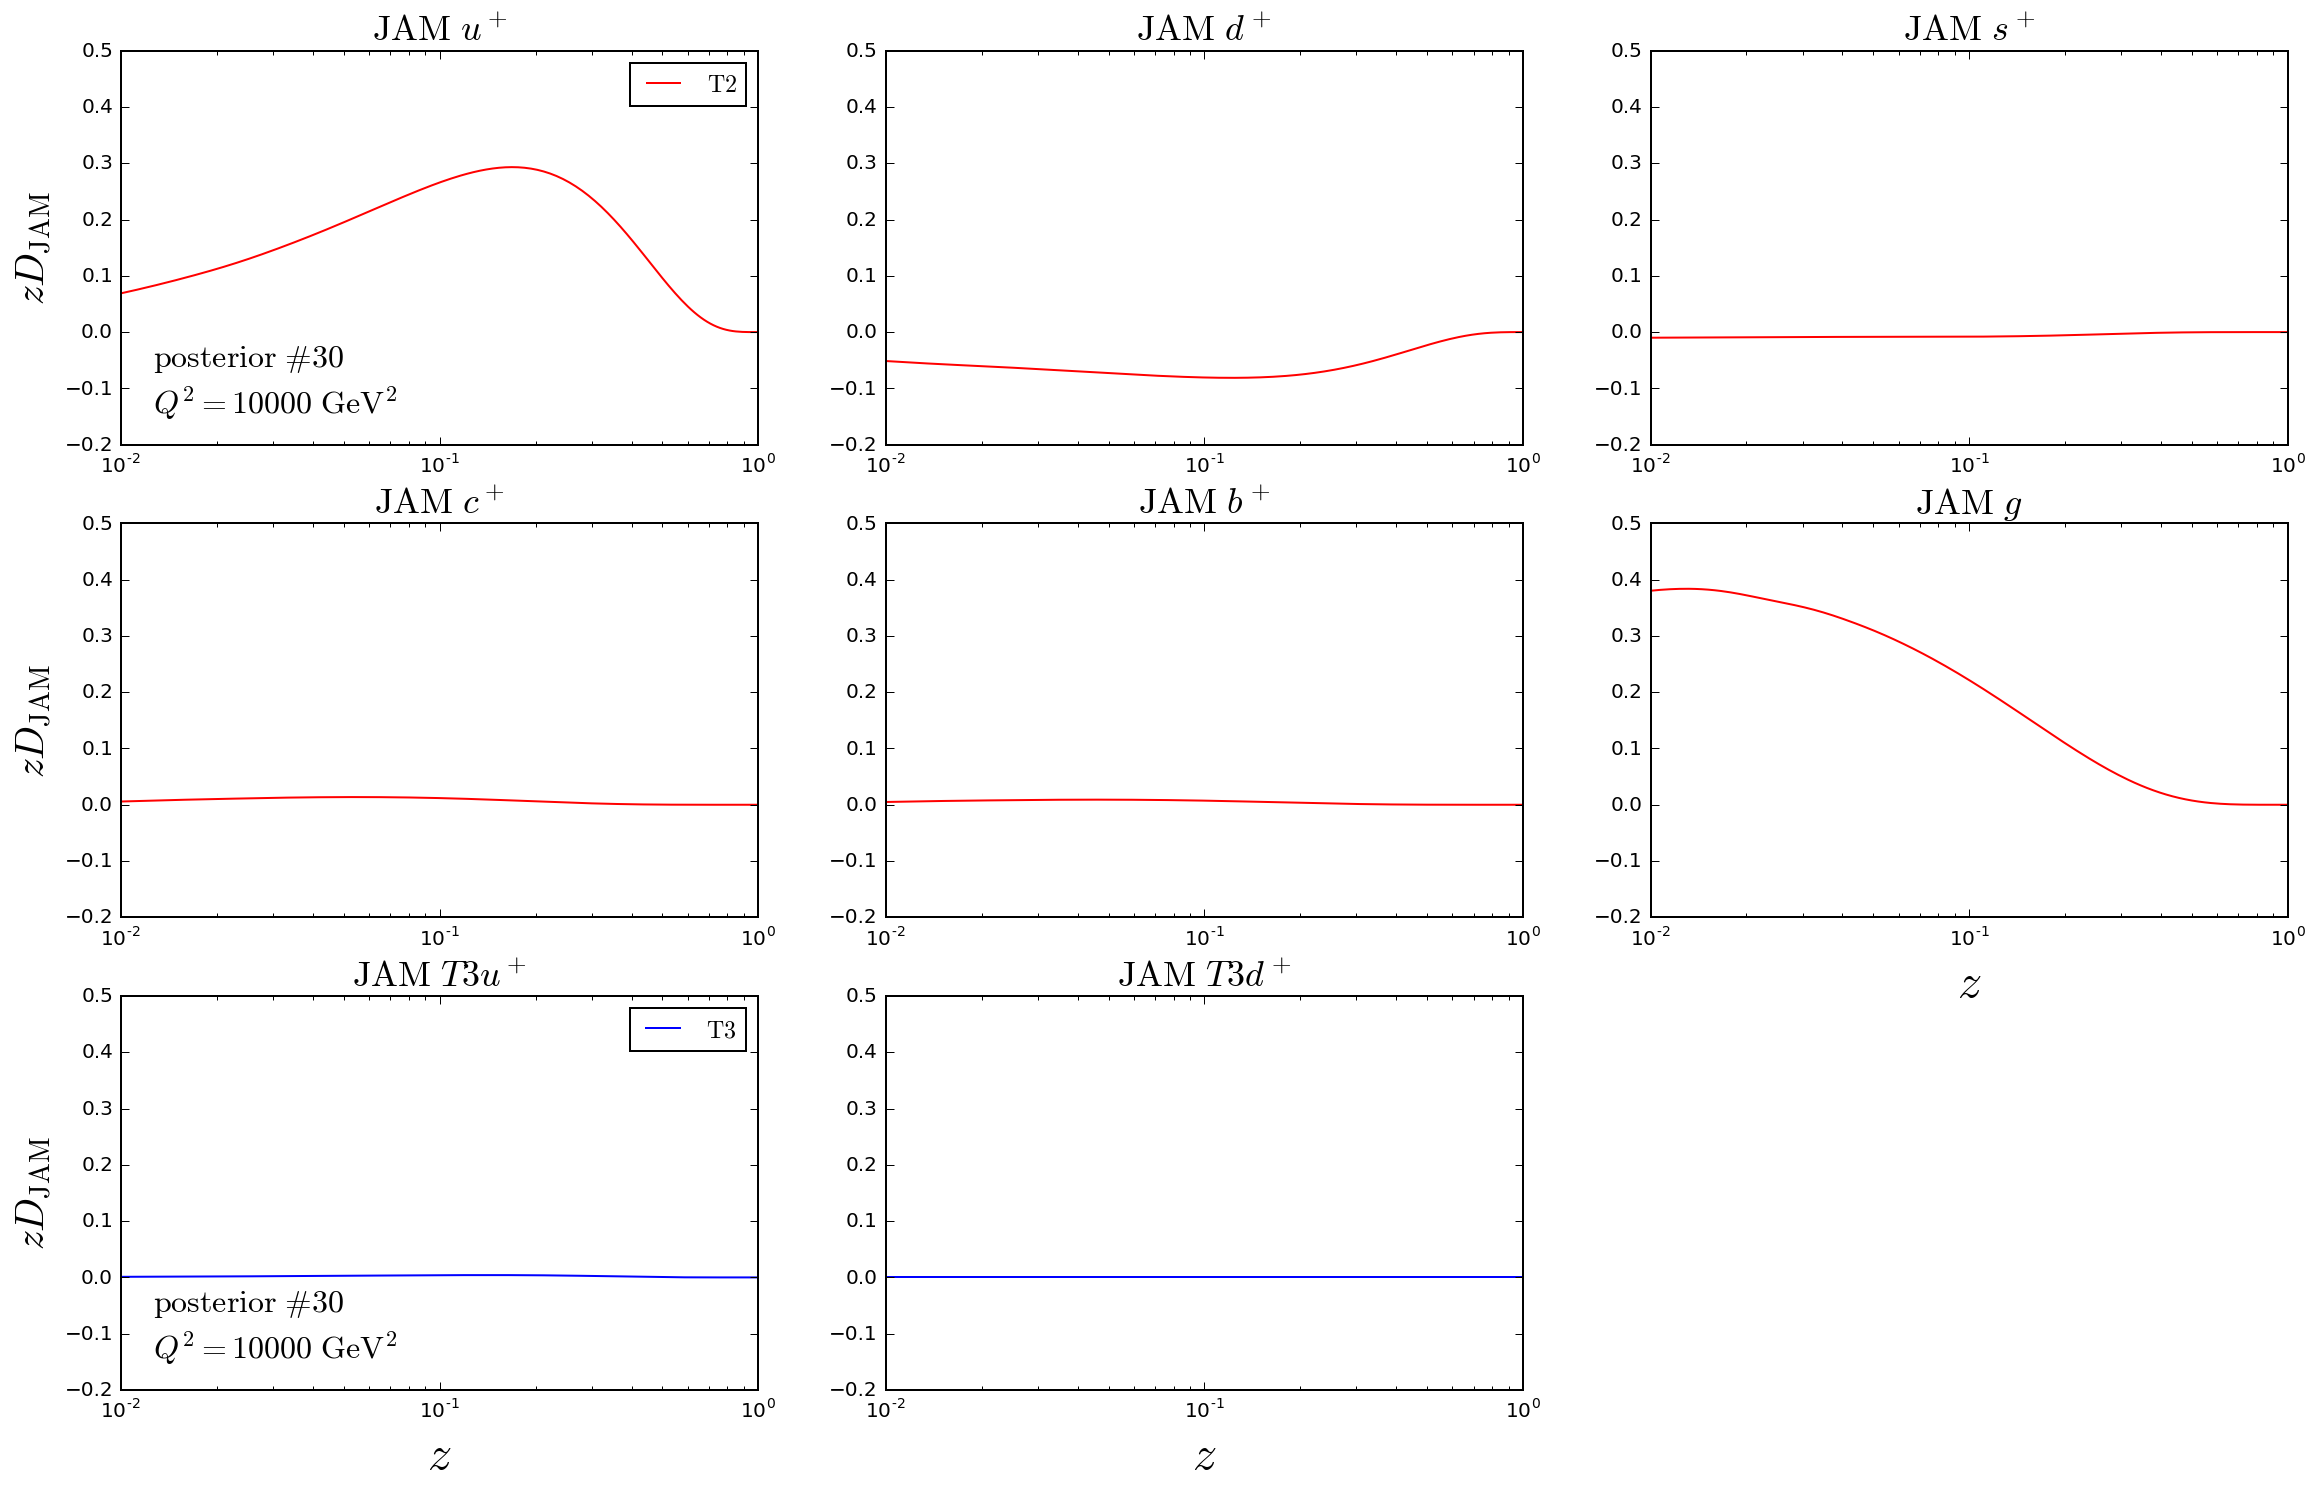

In [4]:
# Twist-2 PDFs

post = 30
Q2 = 10000. #JAMffpi.mZ2 #1.17210230e+02

nrow,ncol,zoom=3,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.01,1,-0.2,0.5]
yscale = 'linear'  # NOTE: polarized PDFs can be negative --> no log scaling generally possible.
xscale = 'log'
nx=200

if xscale=='linear':
  z = np.linspace(plotlims[0],plotlims[1],nx)
else:
  z = np.logspace(np.log10(plotlims[0]),np.log10(plotlims[1]),nx)
zT2_JAM = {}
zT3_JAM = {}
for f in jamPPDF.flavors():
  zT2_JAM[f] = [jamPPDF.get_XF(post,f,z[i],Q2) for i in range(len(z))]
  if f in jamT3PPDF.flavors():
    zT3_JAM[f] = [jamT3PPDF.get_XF(post,f,z[i],Q2) for i in range(len(z))]


flavors = ['up','dp','sp','cp','bp','g']
T3flavors=['T3up','T3dp']

cnt=0
for f in flavors+T3flavors:  
  cnt+=1
  ax = plt.subplot(nrow,ncol,cnt)
  if cnt<=6:
    ax.plot(z,zT2_JAM[f],'r-',label=r'$\rm T2$')
  else:
    ax.plot(z,zT3_JAM[f.replace('T3','')],'b-',label=r'$\rm T3$')    
  plt.axis(plotlims)
  plt.xscale(xscale)
  plt.yscale(yscale)
  plt.title(r'${\rm JAM\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['T3up','T3dp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp','T3up']: 
    plt.ylabel('$zD_{\\rm JAM}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up','T3up']: 
    xQ,yQ = 0.05,0.08
    yQp = 0.2      
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4,transform = ax.transAxes)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4,transform = ax.transAxes)
    plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

## Using LHAPDF interface

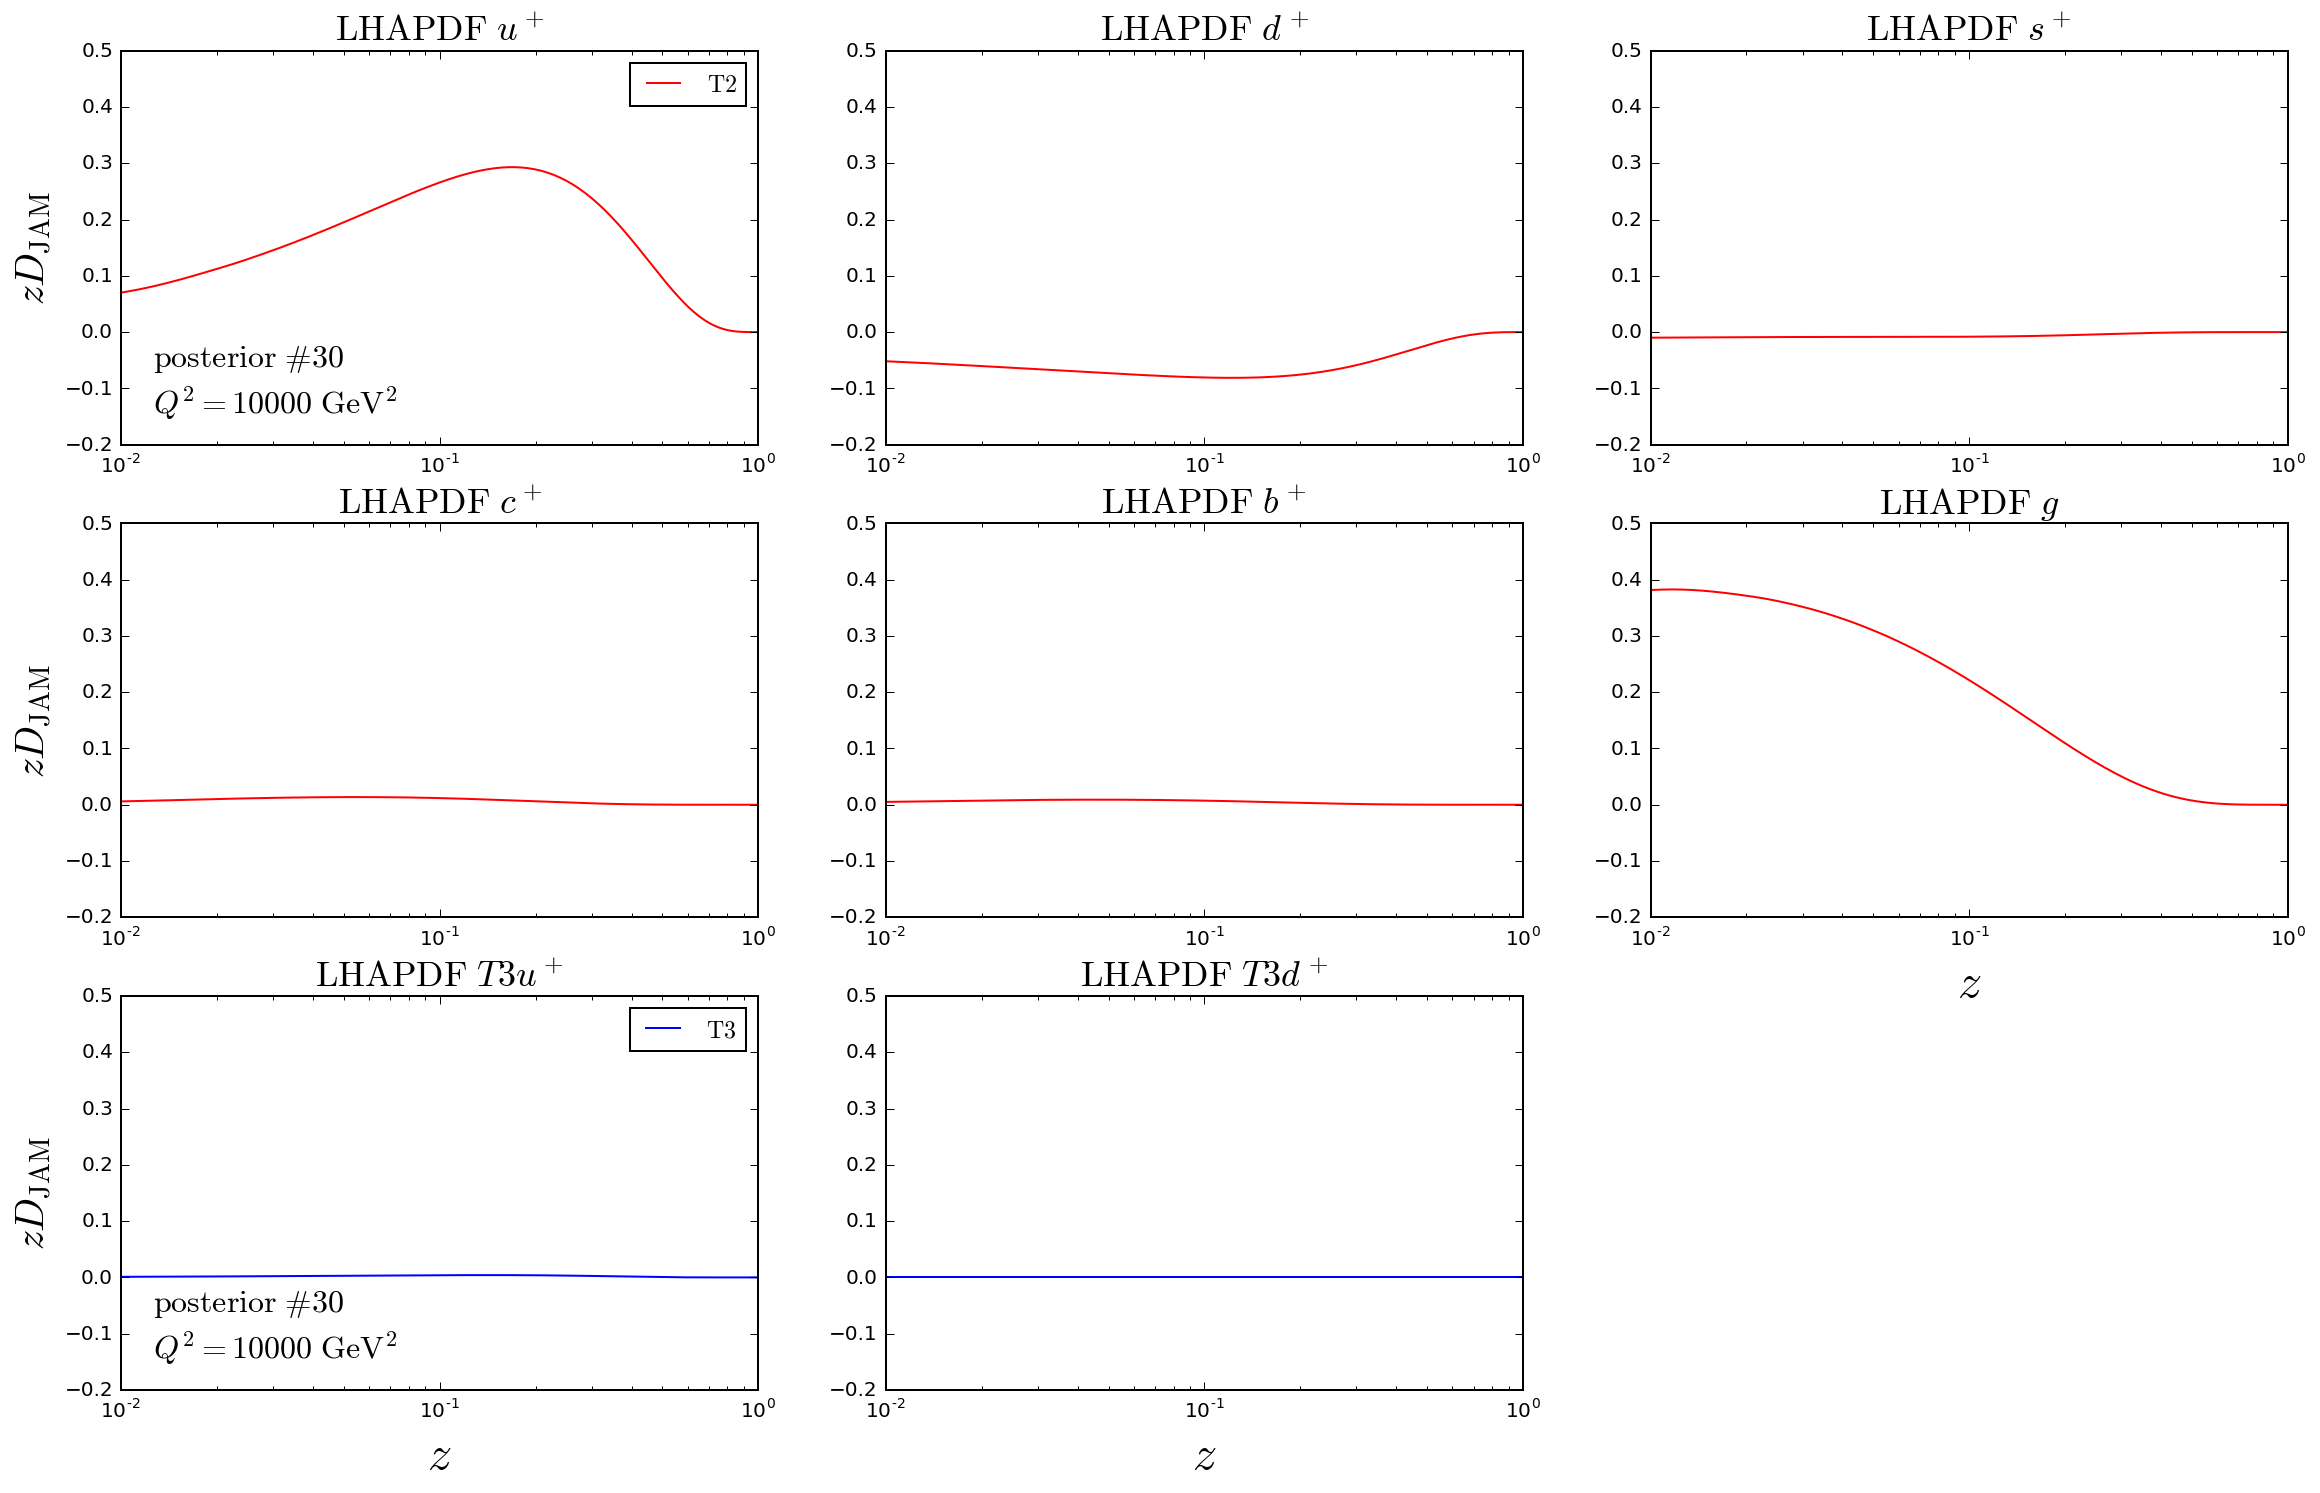

In [5]:
#Plot of JAM z*D(z,Q2) vs z 

member = post+1 # same posterior as JAM (member=0 is the average)
Q2lha=Q2 # (Uses same Q2 as JAM)

lhaT2 = lhapdf.mkPDF("JAM15_PPDF_Ceven",member)
lhaT3 = lhapdf.mkPDF("JAM15_T3PPDF_Ceven",member)

flavdict = {'up':2,'dp':1,'sp':3,'cp':4,'bp':5,'g':21}
flavors = ['up','dp','sp','cp','bp','g']
T3flavors = ['up','dp']

nrow,ncol,zoom=3,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.01,1,-0.2,0.5]
yscale = 'linear'  # NOTE: polarized PDFs can be negative --> no log scaling generally possible.
xscale = 'log'
nxlha = nx

if xscale=='linear':
  z = np.linspace(plotlims[0],plotlims[1],nxlha)
else:
  z = np.logspace(np.log10(plotlims[0]),np.log10(plotlims[1]),nxlha)
zT2_LHA = {}
zT3_LHA = {}
for f in flavdict.keys():
  zT2_LHA[f] = [lhaT2.xfxQ2(flavdict[f],z[i],Q2lha) for i in range(len(z))]
  if f in T3flavors:
    zT3_LHA[f] = [lhaT3.xfxQ2(flavdict[f],z[i],Q2lha) for i in range(len(z))]


flavors = ['up','dp','sp','cp','bp','g']
T3flavors = ['T3up','T3dp']
    
cnt=0
for f in flavors+T3flavors:  
  cnt+=1
  ax = plt.subplot(nrow,ncol,cnt)
  if cnt<=len(flavors):
    ax.plot(z,zT2_LHA[f],'r-',label=r'$\rm T2$')
  else:
    ax.plot(z,zT3_LHA[f.replace('T3','')],'b-',label=r'$\rm T3$')
  plt.axis(plotlims)
  plt.xscale(xscale)
  plt.yscale(yscale)
  plt.title(r'${\rm LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['T3up','T3dp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp','T3up']: 
    plt.ylabel('$zD_{\\rm JAM}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up','T3up']: 
    xQ,yQ = 0.05,0.08
    yQp = 0.2      
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4,transform = ax.transAxes)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4,transform = ax.transAxes)
    plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

## Ratios of LHAPDF / JAM interpolators

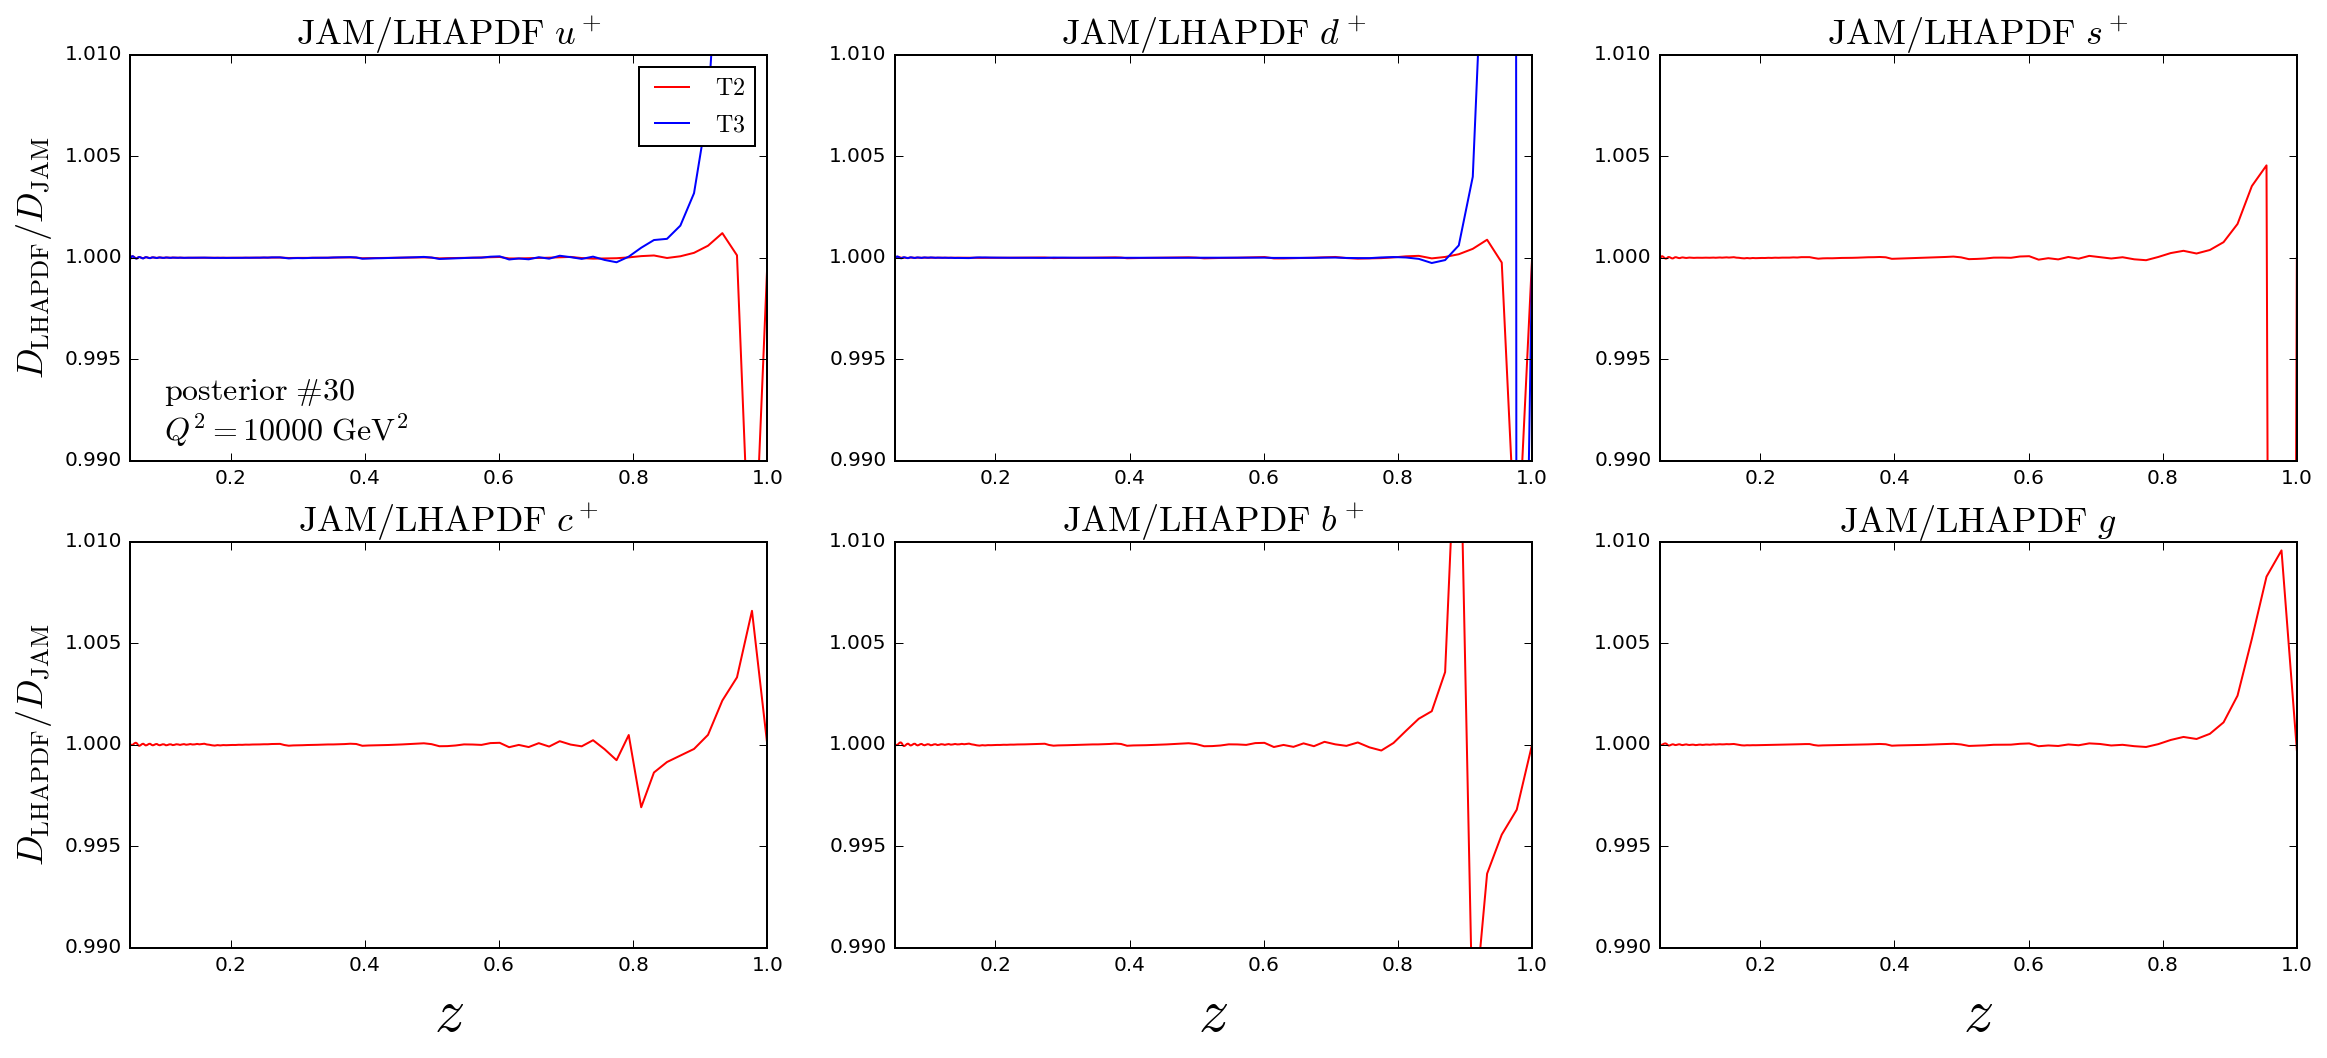

In [6]:
#Ratios JAM/lhapdf for u,d,s

flavors = ['up','dp','sp','cp','bp','g']
T3flavors = ['up','dp']
rT2 = {}
rT3 = {}
for f in flavdict.keys():
  rT2[f] = [zT2_JAM[f][i]/zT2_LHA[f][i] for i in range(len(z))]
  if f in T3flavors:
    rT3[f] = [zT3_JAM[f][i]/zT3_LHA[f][i] for i in range(len(z))]
      
nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))
plotlims=[0.05,1,0.99,1.01]


cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,rT2[f],'r-',label=r'$\rm T2$')
  if f in T3flavors:
    plt.plot(z,rT3[f],'b-',label=r'$\rm T3$')
  plt.title(r'${\rm JAM/LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  plt.axis(plotlims)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=30) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=18*zoom/4) # Label y axis
  if f in ['up']:
    rel=0.15*zoom/4
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    rel=0.05
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16)
    plt.legend()

#plt.savefig('fig.LHA_JAM.%0.0f.png'%Q2)
plt.show()

In [ ]:
print JAMffpi.get_Q2grid()

In [ ]:
print JAMffpi.get_Xgrid()